In [196]:
from google.colab import drive

import regex as re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/CART/Heart_Disease/processed.cleveland.data',header=None)

In [175]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [176]:
df.columns='age','sex','cp','restbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd'

In [177]:
df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [178]:
df.dtypes#here ca and thal are objects so we have to take look into it.

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [45]:
# df.isnull().sum().sum()
# print(df.loc[:,:].isnull().sum())

0


In [179]:
# c = df.apply(lambda x: x.str.contains('\?')).any(axis=1).sum()
# matches =re.finditer('\\?',df.to_string())

# for i in matches:
#   print(i)

# df.iloc[87:]


# df_string=df.to_string()
# for line in df_string.split('\n'):
#   if re.findall('\\?',line):
#     print(line)

# len(df.loc[(df['ca']=='?')|(df['thal']=='?')]) 
df.loc[(df['ca']=='?')|(df['thal']=='?')]     

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [180]:
# num= [x for x in df['ca'] if x.unique()]
# for index, row in df.iterrows(): 
#           if row['ca']=='?':
#             print(f"{row['ca']} and index is {index}")

In [181]:
df = df.drop(index=[87,166,192,266,287,302])

In [185]:
# df.loc[(df['ca']=='?')|(df['thal']=='?')]     
df

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [186]:
X=df.drop(columns='hd',axis=1).copy()
# X=df.iloc[:,:-1]
X.head()
X.shape

(297, 13)

In [187]:
# Y=df['hd'].copy()
Y=df.iloc[:,-1]
Y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [188]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [189]:
X_New=pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_New.head()

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0


In [190]:
Y.unique()

array([0, 2, 1, 3, 4])

In [191]:
Y_not_zero=Y>0
Y[Y_not_zero]=1
Y.unique()
len(X_New)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


297

In [194]:
X_train,X_test,Y_train,Y_test=train_test_split(X_New,Y,random_state=42)

#create a decision tree and fit that into the training data

clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train,Y_train)


In [ ]:
plt.figure(figsize=(15,7.5))

plot_tree(clf_dt,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names=X_New.columns)

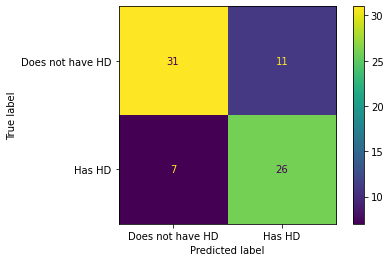

In [199]:
plot_confusion_matrix(clf_dt,X_test,Y_test,display_labels=["Does not have HD","Has HD"])

In [201]:
path=clf_dt.cost_complexity_pruning_path(X_train,Y_train)
path


{'ccp_alphas': array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
        0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
        0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
        0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
        0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
        0.03934523, 0.13046216]),
 'impurities': array([0.        , 0.00885886, 0.02430287, 0.03241098, 0.04060099,
        0.04918815, 0.06463216, 0.08628407, 0.10364689, 0.1156589 ,
        0.12767091, 0.13367692, 0.14035282, 0.14710958, 0.15468333,
        0.17091343, 0.17960069, 0.18849919, 0.19888101, 0.2094587 ,
        0.2379082 , 0.25394872, 0.27037333, 0.29140408, 0.32820413,
        0.36754937, 0.49801153])}

In [205]:
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]# exclude last because it will contain only the root node and that is not a tree at all.
ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
       0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

In [207]:
#now we have to create decision tree per value of alpha and store it into the array.
clf_dts=[]


for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,Y_train)
    clf_dts.append(clf_dt)

In [ ]:
clf_dts

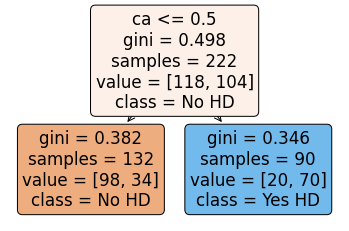

In [210]:
for clf_dt in clf_dts:
  plot_tree(clf_dt,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names=X_New.columns)

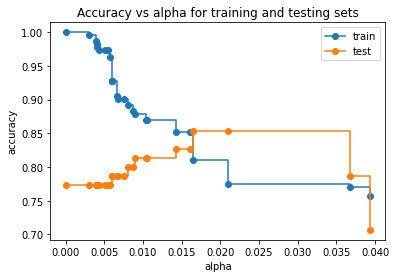

In [211]:
train_scores=[clf_dt.score(X_train,Y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,Y_test) for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

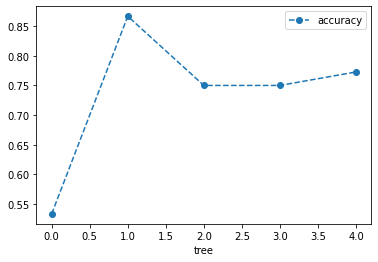

In [212]:
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)
#we will use 5-fold data
scores=cross_val_score(clf_dt,X_train,Y_train,cv=5)

df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

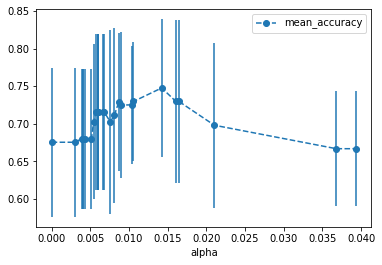

In [216]:
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,X_train,Y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    

alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',
                     y="mean_accuracy",
                     yerr='std',
                     marker='o',
                     linestyle='--')

In [223]:
#so we found out that alpha value of around 0.014 is accurate enough for us.

alpha_results[(alpha_results['alpha']>0.014)
&
(alpha_results['alpha']<0.015)
]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [224]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.014)
&
(alpha_results['alpha']<0.015)
]['alpha']

#convert it into the float because we want to pass it value as float(before it was series)
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

In [225]:
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(X_train,Y_train)

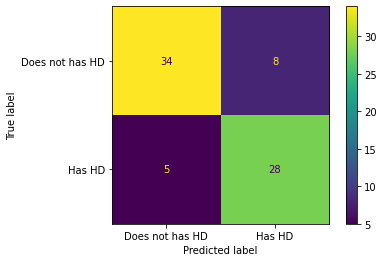

In [226]:
plot_confusion_matrix(clf_dt_pruned,X_test,Y_test,display_labels=["Does not has HD","Has HD"])

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(257.53846153846155, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(386.3076923076923, 152.8875, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(708.2307692307693, 254.8125, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes H

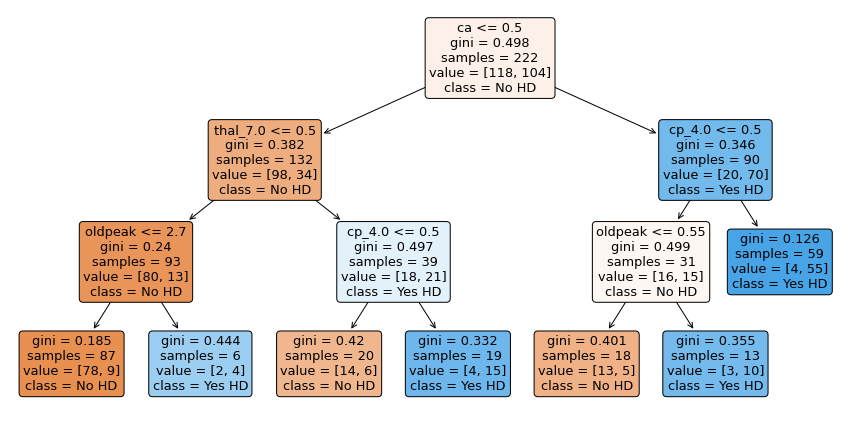

In [227]:
plt.figure(figsize=(15,7.5))

plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names=X_New.columns)